In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dataset(X, y):
    plt.plot(X, y, 'b^')
    plt.xlabel(r'$x_1$', fontsize=12)
    plt.ylabel(r'$y_1$', rotation=False, fontsize=12)

def linear_data(n_samples=100):
    noise = np.random.randn(n_samples, 1)
    X = 3 * np.random.rand(n_samples, 1)
    y = (2 * X + 3 + noise).ravel()
    return X, y

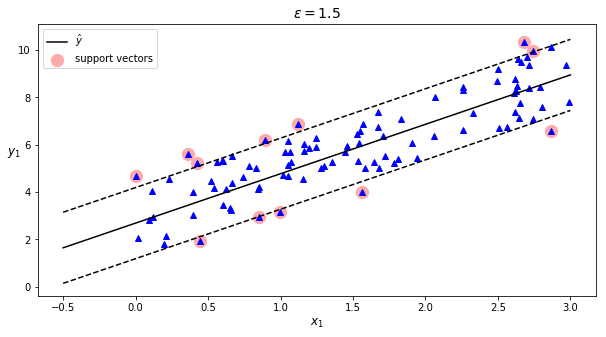

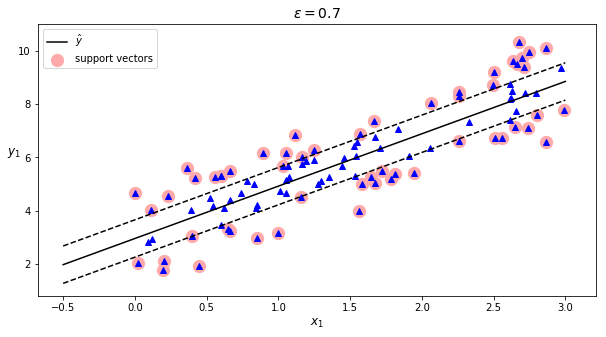

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

def plot_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    support_vectors_indice = np.argwhere(off_margin)
    plt.scatter(X[support_vectors_indice], y[support_vectors_indice],
                s=150, facecolors='#FFAAAA', label='support vectors')
    plt.legend()

def plot_decision_boundary(svm_reg, axes, n=100):
    x = np.linspace(axes[0], axes[1], n).reshape(-1,1)
    y_pred = svm_reg.predict(x)
    # Draw a decision boundary.
    plt.plot(x, y_pred, 'k', label=r'$\hat{y}$')
    # Draw plus and minus margin.
    plt.plot(x, y_pred + svm_reg.epsilon, 'k--')
    plt.plot(x, y_pred - svm_reg.epsilon, 'k--')
    plt.legend(fontsize=12)

X, y = linear_data()

for eps in [1.5, 0.7]:
    lin_svm_reg = LinearSVR(epsilon=eps)

    lin_svm_reg.fit(X, y)
    
    title = r'$\epsilon={}$'.format(eps)
    plt.figure(title, figsize=(10,5))
    plt.title(title, fontsize=14)
    plot_dataset(X, y)
    plot_decision_boundary(lin_svm_reg, [-0.5, 3.0, -0.5, 12.0])
    plot_support_vectors(lin_svm_reg, X, y)
    plt.show()

In [3]:
def second_order_data(n_samples=100):
    noise = np.random.randn(n_samples, 1)
    X = 2 * np.random.rand(n_samples, 1) - 1
    y = (0.5 * X**2 + 0.1 * X + 0.2 + noise / 10).ravel()
    return X, y

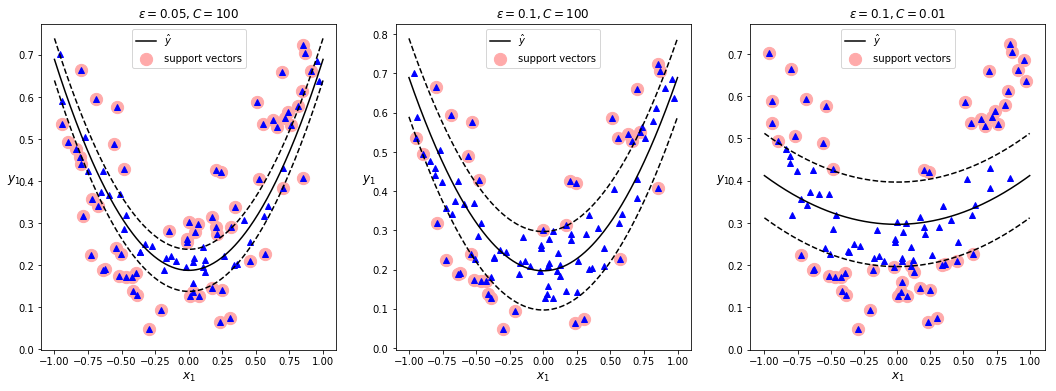

In [4]:
from sklearn.svm import SVR

X, y = second_order_data()

plt.figure('Second order polynomial SVM regressor', figsize=(18,6))

for eps, regulation, sub_plot_num in ([(0.05, 100, 131), (0.1, 100, 132), (0.1, 0.01, 133)]):
    poly_svm_reg = SVR(kernel='poly', gamma='auto', degree=2,
                       epsilon=eps, C=regulation)
    poly_svm_reg.fit(X, y)
    
    plt.subplot(sub_plot_num)
    title = r'$\epsilon={}, C={}$'.format(eps, regulation)
    plt.title(title)
    plot_dataset(X, y)
    plot_decision_boundary(poly_svm_reg, [-1.0, 1.0, 0.0, 1.0], n=300)
    plot_support_vectors(poly_svm_reg, X, y)
plt.show()